In [18]:
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y

In [19]:

%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = inc(1)
y = inc(2)
z = add(x, y)

Wall time: 3.01 s


In [20]:

from dask import delayed

In [21]:

%%time
#Parallelize with the dask.delayed decorator
# This runs immediately, all it does is build a graph

x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x, y)

Wall time: 13 ms


In [22]:
%%time
z.compute()

Wall time: 2.28 s


5

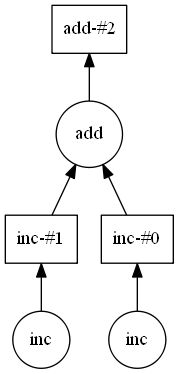

In [23]:
z.visualize()


In [24]:
#Exercise: parallelize a for loop;

data = [1, 2, 3, 4, 5, 6, 7, 8]



In [25]:
%%time

results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

Wall time: 8.05 s


In [26]:
%%time
##Dask
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = sum(results)


Wall time: 2 ms


In [27]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return x & 1 == 0


data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [28]:
%%time

results = []

for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)
    
    
total = sum(results)
print(total)
    

90
Wall time: 10 s


In [29]:
%%time
results = []
for x in data:
    if is_even(x):
        y = delayed( double)(x)
    else:
        y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results) #


Wall time: 2 ms


90


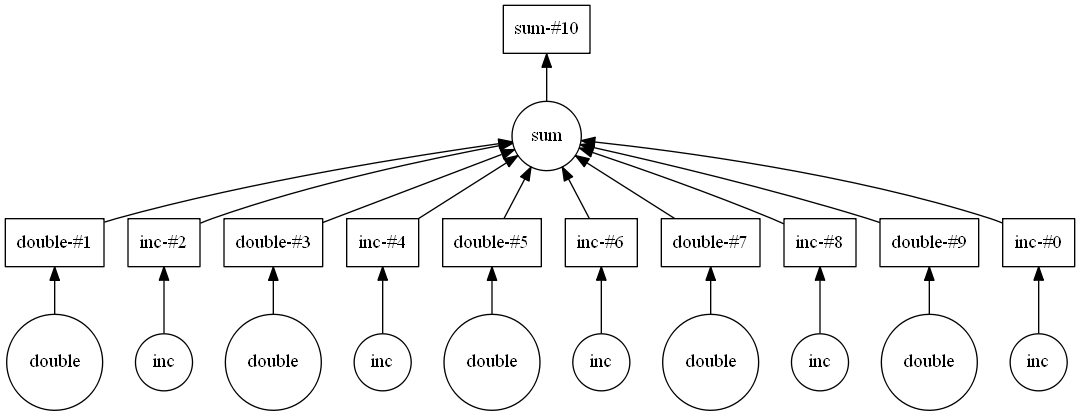

In [30]:
print( total.compute())
total.visualize()

In [31]:
##parallel pandas

#%run prep_data.py

In [32]:
import os
import pandas as pd

sorted(os.listdir(os.path.join('data')))
df = pd.read_csv(os.path.join('data','2007.csv.bz2'))

In [33]:
df.head()
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn                 int64
TaxiOut                int64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay           int64
WeatherDelay           int64
NASDelay               int64
SecurityDelay          int64
LateAircraftDelay      int64
dtype: object

In [34]:
#unique origin
df.Origin.unique()

array(['SMF', 'SNA', 'STL', 'TPA', 'TUL', 'TUS', 'ABQ', 'ALB', 'AMA',
       'AUS', 'BDL', 'BHM', 'BNA', 'BOI', 'BUF', 'BUR', 'BWI', 'CLE',
       'CMH', 'CRP', 'DAL', 'DEN', 'DTW', 'ELP', 'FLL', 'GEG', 'HOU',
       'HRL', 'IAD', 'IND', 'ISP', 'JAN', 'JAX', 'LAS', 'LAX', 'LBB',
       'LIT', 'MAF', 'MCI', 'MCO', 'MDW', 'MHT', 'MSY', 'OAK', 'OKC',
       'OMA', 'ONT', 'ORF', 'PBI', 'PDX', 'PHL', 'PHX', 'PIT', 'PVD',
       'RDU', 'RNO', 'RSW', 'SAN', 'SAT', 'SDF', 'SEA', 'SJC', 'SLC',
       'AEX', 'IAH', 'BFL', 'EWR', 'GSP', 'ATL', 'ORD', 'SRQ', 'CAE',
       'MSP', 'LFT', 'GRR', 'SAV', 'LRD', 'ICT', 'XNA', 'DAY', 'BPT',
       'MOB', 'HPN', 'SYR', 'CLT', 'MSN', 'BTV', 'JFK', 'BRO', 'PNS',
       'CHS', 'MEM', 'GSO', 'MLU', 'ROC', 'GPT', 'LGA', 'RIC', 'TYS',
       'VPS', 'AVL', 'DFW', 'BOS', 'ABE', 'CVG', 'BTR', 'MKE', 'SHV',
       'DCA', 'COS', 'TLH', 'HSV', 'PWM', 'MGM', 'DAB', 'MDT', 'MTJ',
       'MFE', 'LCH', 'LEX', 'MIA', 'CLL', 'PSP', 'CHA', 'DSM', 'CRW',
       'GRK', 'MYR',

In [35]:
#mean departure delay per-airport for one year
df.groupby('Origin').DepDelay.mean()

Origin
ABE     8.962693
ABI    10.227806
ABQ     8.160730
ABY    12.383476
ACK    51.346570
ACT     7.165919
ACV    13.101686
ACY    21.058321
ADK     8.010309
ADQ     9.400631
AEX     9.886825
AGS    18.280108
AKN    22.461538
ALB    12.343620
ALO    16.048872
AMA     9.420343
ANC    10.259538
APF    16.454545
ASE    11.687934
ATL    14.653325
ATW    11.988003
AUS     8.199219
AVL    17.538757
AVP    14.993834
AZO    10.150653
BDL     9.357085
BET    10.243830
BFL     5.096611
BGM    11.956474
BGR    15.135709
         ...    
SRQ     7.491803
STL    10.320637
STT    11.128038
STX    12.623679
SUN     0.337290
SUX     8.603376
SWF    10.770285
SYR    14.024492
TEX    14.298913
TLH    10.515231
TOL    11.375312
TPA     9.080159
TRI    18.542683
TTN    10.268831
TUL     9.386376
TUP    10.088339
TUS     6.220744
TVC    11.766893
TWF    -1.840942
TXK     9.912775
TYR    10.378255
TYS     9.985949
VLD    15.105928
VPS    13.089362
WRG     9.744318
WYS    -5.000000
XNA    13.887600
YAK    

In [36]:
#Sequential code: Mean Departure Delay per airport;

from glob import glob
filenames = sorted(glob(os.path.join('data','*.csv')))

In [37]:
%%time
sums = []
counts = []

for fn in filenames:
    # read in file
    df = pd.read_csv(fn)
    
    #groupby origin airport
    by_origin = df.groupby('Origin')
    
    #sum of all departure delays by origin
    total = by_origin.DepDelay.sum()
    
    #Number of flights by origin
    count = by_origin.DepDelay.count()
    
    # save the flights 
    sums.append(total)
    counts.append(count)
    
#combine intermediates to get ttoal mean-dealy-per-origin
total_delays = sum(sums)
n_flights = sum(counts)

mean = total_delays / n_flights

Wall time: 1min 41s


In [38]:
mean

Origin
ABE     8.526383
ABI     8.588246
ABQ     7.800323
ABY    11.734858
ACK    38.408046
ACT     6.260063
ACV    14.130393
ACY    20.710784
ADK    10.756614
ADQ     7.528913
AEX     9.392020
AGS    14.941652
AKN    22.283582
ALB    10.762066
ALO    11.160748
AMA     8.765446
ANC     8.628493
APF          NaN
ASE    12.281341
ATL    13.083637
ATW    10.642513
AUS     7.819093
AVL    13.475286
AVP    13.886224
AZO     9.504787
BDL     8.518892
BET     9.054950
BFL     3.504382
BGM     9.372452
BGR    14.061684
         ...    
SRQ     8.614695
STL    10.032803
STT    10.052183
STX    13.658564
SUN    -0.400454
SUX     8.061538
SWF     9.113777
SYR    12.836568
TEX    15.005935
TLH     8.586127
TOL     9.915514
TPA     9.051905
TRI    10.637157
TTN          NaN
TUL     8.686144
TUP     9.847222
TUS     5.784261
TVC    11.315672
TWF    -0.793980
TXK     7.922714
TYR     7.811136
TYS     9.663203
VLD    13.074833
VPS    11.305250
WRG     9.004286
WYS    -5.577947
XNA    12.617956
YAK    

In [39]:
#2. Arrays;

%run prep_data.py


Setting up data directory
-------------------------
** Finished! **
Finished!


In [40]:
#Parallellizig the Pandas Groupby:
import os
import pandas as pd
sorted(os.listdir(os.path.join('data', 'nycflights')))

['1990.csv',
 '1991.csv',
 '1992.csv',
 '1993.csv',
 '1994.csv',
 '1995.csv',
 '1996.csv',
 '1997.csv',
 '1998.csv',
 '1999.csv']

In [41]:
df = pd.read_csv(os.path.join('data','nycflights','1990.csv'))
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [42]:
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum              float64
ActualElapsedTime    float64
CRSElapsedTime         int64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance             float64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
Diverted               int64
dtype: object

In [43]:
df['Origin'].unique()

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [44]:
#mean departure delay per-airport for one year
df.groupby('Origin')['DepDelay'].mean()  #OR df.groupby('Origin').DepDelay.mean()

Origin
EWR     9.168411
JFK    11.857274
LGA     8.560045
Name: DepDelay, dtype: float64

In [45]:
#Sequential code:
from glob import glob
filenames = sorted(glob(os.path.join('data','nycflights','*.csv')))


In [46]:
%%time

sums = []
counts = []

for fn in filenames:
    df = pd.read_csv(fn)
    
    #groupby origin airport
    by_origin = df.groupby('Origin')
    
    ##sum of all departure delays by origin
    count = by_origin.DepDelay.count()
    
    #save into lists
    sums.append(total)
    counts.append(count)
    
#combine 
total_delays = sum(sums)
n_flights = sum(counts)
mean = total_delays / n_flights

Wall time: 18.3 s


In [47]:
mean

Origin
ABE   NaN
ABI   NaN
ABQ   NaN
ABY   NaN
ACK   NaN
ACT   NaN
ACV   NaN
ACY   NaN
ADK   NaN
ADQ   NaN
AEX   NaN
AGS   NaN
AKN   NaN
ALB   NaN
ALO   NaN
AMA   NaN
ANC   NaN
ASE   NaN
ATL   NaN
ATW   NaN
AUS   NaN
AVL   NaN
AVP   NaN
AZO   NaN
BDL   NaN
BET   NaN
BFL   NaN
BGM   NaN
BGR   NaN
BHM   NaN
       ..
SPS   NaN
SRQ   NaN
STL   NaN
STT   NaN
STX   NaN
SUN   NaN
SUX   NaN
SWF   NaN
SYR   NaN
TEX   NaN
TLH   NaN
TOL   NaN
TPA   NaN
TRI   NaN
TUL   NaN
TUP   NaN
TUS   NaN
TVC   NaN
TWF   NaN
TXK   NaN
TYR   NaN
TYS   NaN
VLD   NaN
VPS   NaN
WRG   NaN
WYS   NaN
XNA   NaN
YAK   NaN
YKM   NaN
YUM   NaN
Name: DepDelay, Length: 303, dtype: float64

In [ ]:
#parallel
sums = []
counts = []

for fn in filenames:
    #read file parallerl
    df = delayed(pd.read_csv)(fn)
    
    by_origin = df.groupby('Origin')
    
    total = by_origin.DepDelay.sum()
    
    count = by_origin.DepDelay.count()
    
    sums.append(total)
    counts.append(count)
    
#compute 
sums,counts = compute(sums, counts)

total_delays = sum(sums)
n_flights = sum(counts)

mean = total_delays / n_flights

In [2]:
##2-dask arrays: Distributed numpy ( parallel, larger-than-memory, Blocked algorithms).
#blocked algorithms: executes on a larger dataset by breaking it up into many small blocks.

from prep_data import random_array
random_array()

#load data
import h5py
import os

f = h5py.File(os.path.join('data','random.hdf5'), mode='r')
dset = f['/x']
dset

C:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<HDF5 dataset "x": shape (1000000000,), type "<f4">

In [58]:
#compute the sum of large array, one million at a time
sums = []
for i in range(0,1000000000,1000000):
    chunk = dset[i: i + 1000000 ] #pull out memory
    sums.append(chunk.sum() )
total = sum(sums)
print(total)

999980481.8125


In [ ]:
%%time
#compute the mean using blocked algorithm:

sums = []
lenghts = []

for i in range(0, 1000000000, 1000000):
    chunk = dset[i : i + 1000000] #pull out memory
    sums.append(chunk.sum())
    lenghts.append(len(chunk))
total = sum(sums)
length = sum(lenghts)

print( total/lenghts)

In [3]:
#dask.array contains these algorithms: 
import dask.array as da
x = da.from_array(dset, chunks=(1000000,))
x

dask.array<array, shape=(1000000000,), dtype=float32, chunksize=(1000000,)>

In [7]:
%%time
result = x.sum() #supports sum, variance
result

Wall time: 17 ms


In [5]:
result.compute()

999980500.0

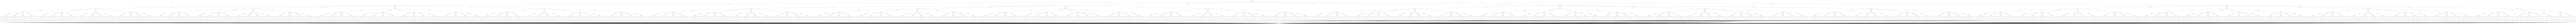

In [6]:
result.visualize()

In [9]:
#meteorological data:

from prep_data import weather
weather()

In [10]:
import h5py
from glob import glob
import os

filenames = sorted(glob(os.path.join('data','weather-big', '*.hdf5')))
dsets = [ h5py.File(filename, mode='r')['/t2m'] for filename in filenames ]
dsets[0]

<HDF5 dataset "t2m": shape (5760, 11520), type "<f8">

In [11]:
dsets[0][:5, :5]

array([[22.53240967, 23.89801025, 25.26361084, 26.62921143, 27.99481201],
       [23.89801025, 25.34637451, 26.79473877, 28.24310303, 29.69146729],
       [25.26361084, 26.79473877, 28.3258667 , 29.85699463, 31.38812256],
       [26.62921143, 28.24310303, 29.85699463, 31.47088623, 33.08477783],
       [27.99481201, 29.69146729, 31.38812256, 33.08477783, 34.78143311]])

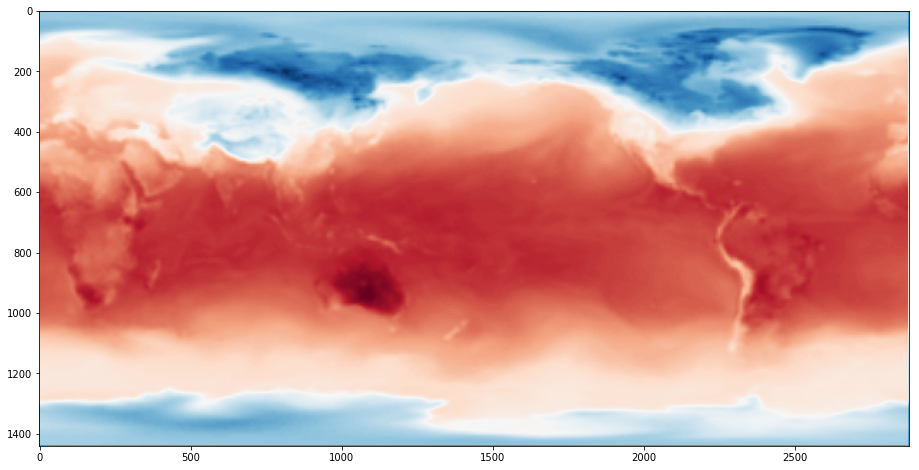

In [12]:

%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
plt.imshow(dsets[0][::4, ::4], cmap='RdBu_r')

In [13]:
arrays = [da.from_array(dset, chunks=(500, 500)) for dset in dsets]
arrays

[dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize=(500, 500)>,
 dask.array<array, shape=(5760, 11520), dtype=float64, chunksize

In [14]:
#stack this list of dask.array objects into a single dask.array object with da.stack

x = da.stack(arrays, axis=0)
x

dask.array<stack, shape=(31, 5760, 11520), dtype=float64, chunksize=(1, 500, 500)>

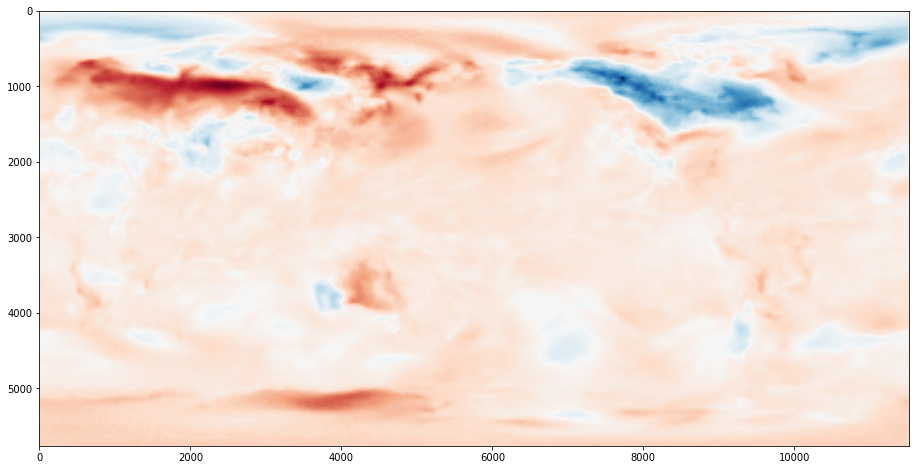

In [15]:
#plot first day from the mean
result = x[0] - x.mean(axis=0)
fig = plt.figure(figsize=(16, 8))
plt.imshow(result, cmap='RdBu_r')

In [ ]:
result = x.mean(axis=0)
fig = plt.figure(figsize=(16, 8))
plt.imshow(result, cmap='RdBu_r')

In [ ]:
result = x[:, ::2, ::2]
da.to_hdf5(os.path.join('data', 'myfile.hdf5'), '/output', result)